## Import

In [54]:
from types import NoneType

import pandas as pd
import numpy as np
import sns

df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')

In [55]:
df.head()

,location_key,subregion1_code_x,subregion1_name_x,date,country_name_x,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,subregion1_code_y,...,subregion1_code,subregion1_name,country_name,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,Q
0,AT_6,6,Styria,2021-11-06,Austria,495,106873,41606,14032909,6,...,6,Styria,Austria,372,838196,132,796304,504,1634500,2021Q4
1,IT_45,45,Emilia-Romagna,2022-01-12,Italy,18631,730330,73593,12303523,45,...,45,Emilia-Romagna,Italy,4206,3561423,3438,3321218,50387,8932438,2022Q1
2,IT_72,72,Campania,2022-01-07,Italy,9739,664276,57570,10087492,72,...,72,Campania,Italy,8279,4324794,6147,3988437,76077,10522164,2022Q1
3,PL_26,26,Swietokrzyskie,2021-07-28,Poland,3,2015,1263,1289,26,...,26,Swietokrzyskie,Poland,1276,520177,2164,444460,3440,964637,2021Q3
4,GB_WLS,WLS,Wales,2021-03-31,United Kingdom,108,209741,14550,3046569,WLS,...,WLS,Wales,United Kingdom,16702,1443885,11601,449538,28303,1893423,2021Q1


In [56]:
df.describe()
df['subregion1_code_x'].isna().sum()

np.int64(25420)

In [57]:
countries_df.head()

,location_key_x,subregion1_code_x,subregion1_name_x,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,population,population_male,population_female,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,BD,NaN,NaN,BD,Bangladesh,BD,BGD,164689383,83259108,81430275,...,7.961189e+10,9.163128e+10,1.024778e+11,1.152791e+11,1.286379e+11,1.333557e+11,1.499905e+11,1.728855e+11,1.950787e+11,2.214152e+11
1,GA,NaN,NaN,GA,Gabon,GA,GAB,2225728,1132854,1092874,...,1.243896e+10,1.550857e+10,1.206514e+10,1.435859e+10,1.818648e+10,1.717145e+10,1.759075e+10,1.817972e+10,1.426203e+10,1.421356e+10
2,HR,NaN,NaN,HR,Croatia,HR,HRV,4076246,1972572,2103674,...,6.009316e+10,7.048145e+10,6.270310e+10,5.966543e+10,6.223675e+10,5.648530e+10,5.776987e+10,5.708037e+10,4.892188e+10,5.071496e+10
3,LK,NaN,NaN,LK,Sri Lanka,LK,LKA,21413250,10267351,11145899,...,3.235025e+10,4.071381e+10,4.206622e+10,5.672575e+10,6.529274e+10,6.843440e+10,7.431781e+10,7.935646e+10,8.061199e+10,8.132188e+10
4,NaN,NaN,NaN,NaN,Namibia,NaN,NAM,2540916,1231683,1309233,...,8.740866e+09,8.486722e+09,8.876191e+09,1.128219e+10,1.240963e+10,1.301627e+10,1.271779e+10,1.278608e+10,1.157114e+10,1.094788e+10


In [58]:
countries_df.describe()

,subregion1_code_x,subregion1_name_x,population,population_male,population_female,population_density_x,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
count,0.0,0.0,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.000000,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.360000e+02
mean,NaN,NaN,4.739199e+07,2.399633e+07,2.337054e+07,239.992328,0.715438,4.324655e+11,15769.686131,17.835316,...,2.804792e+11,3.150346e+11,2.982958e+11,3.304192e+11,3.734704e+11,3.778555e+11,3.879545e+11,3.978471e+11,3.678356e+11,3.745047e+11
std,NaN,NaN,1.725282e+08,8.893505e+07,8.361013e+07,763.884667,0.152899,1.408638e+12,20401.665167,25.185132,...,7.114949e+11,7.966928e+11,7.910842e+11,8.735504e+11,1.000325e+12,1.044687e+12,1.079501e+12,1.135234e+12,1.127300e+12,1.155853e+12
min,NaN,NaN,7.199100e+04,3.504100e+04,3.629800e+04,2.110000,0.354000,5.960333e+08,261.000000,-41.200000,...,4.213759e+08,4.581902e+08,4.890743e+08,4.938244e+08,5.010253e+08,4.859980e+08,5.019793e+08,5.236663e+08,5.350958e+08,5.814840e+08
25%,NaN,NaN,2.961161e+06,1.606609e+06,1.498593e+06,25.759000,0.591000,1.418044e+10,2229.000000,1.300000,...,7.880509e+09,8.496966e+09,8.621574e+09,1.000367e+10,1.151839e+10,1.229277e+10,1.258212e+10,1.278608e+10,1.169229e+10,1.101091e+10
50%,NaN,NaN,1.023018e+07,5.165979e+06,5.096935e+06,91.000000,0.741000,5.604591e+10,6977.000000,17.000000,...,2.674387e+10,3.186255e+10,3.547712e+10,3.841963e+10,4.226270e+10,4.386857e+10,4.764821e+10,4.916577e+10,4.892188e+10,4.737364e+10
75%,NaN,NaN,3.286627e+07,1.677100e+07,1.606720e+07,213.783000,0.831000,2.823182e+11,19116.000000,38.500000,...,1.787067e+11,2.081816e+11,1.924084e+11,2.336095e+11,2.522520e+11,2.500921e+11,2.699801e+11,2.609903e+11,2.425179e+11,2.549993e+11
max,NaN,NaN,1.439324e+09,7.382473e+08,7.010764e+08,8357.633000,0.957000,1.434290e+13,116348.000000,65.000000,...,4.515265e+12,5.037908e+12,5.231383e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119915e+13


## Część 1

1. Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań

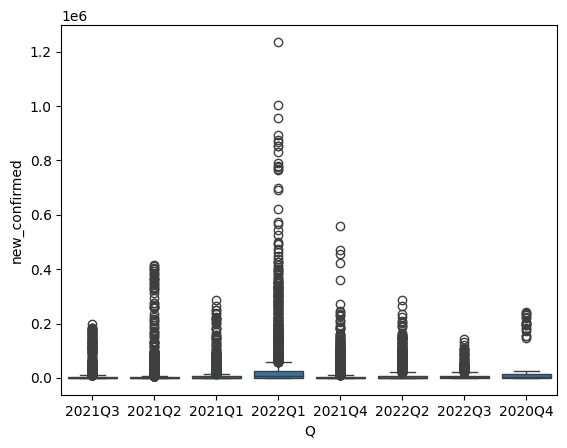

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='Q', y='new_confirmed', data=df[df.subregion1_code_x.isna()])
plt.show()

1.2. liczby nowych śmierci



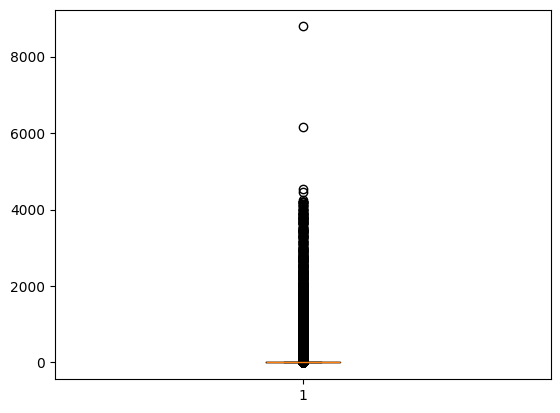

In [34]:
plt.boxplot(df['new_deceased'])
plt.show()

1.3. liczby nowych szczepień



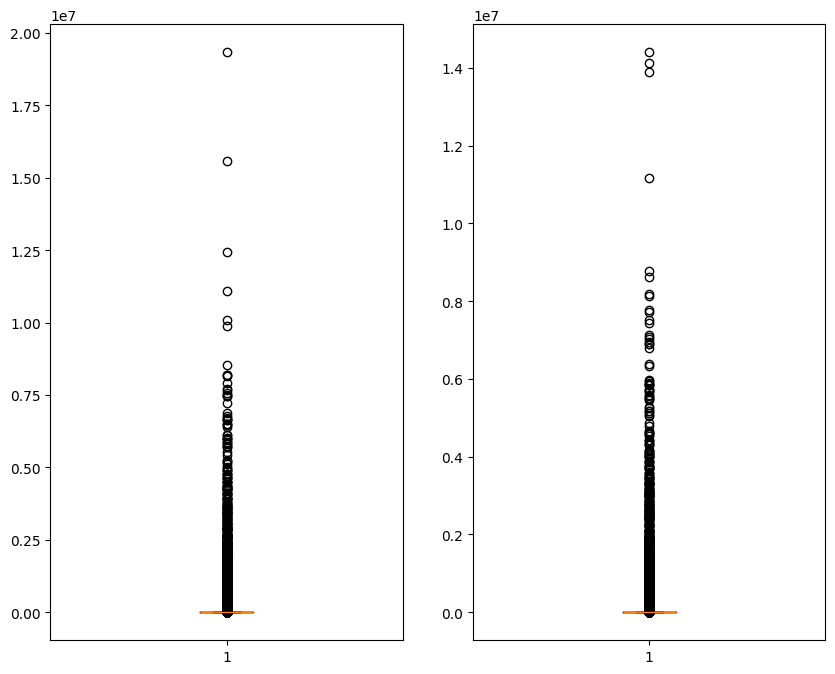

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(df['new_persons_vaccinated'])
ax[1].boxplot(df['new_persons_fully_vaccinated'])
plt.show()


1.4. populacji



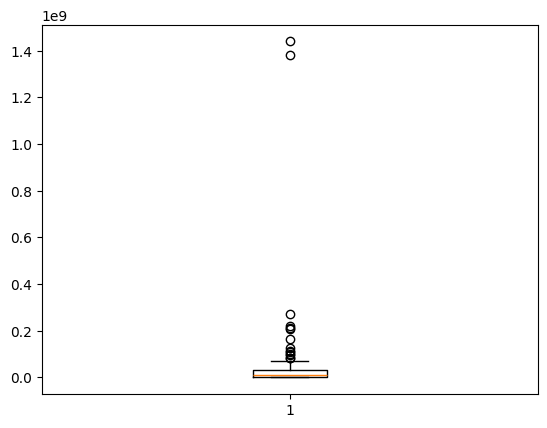

In [36]:
plt.boxplot(countries_df['population']);

1.5. PKB



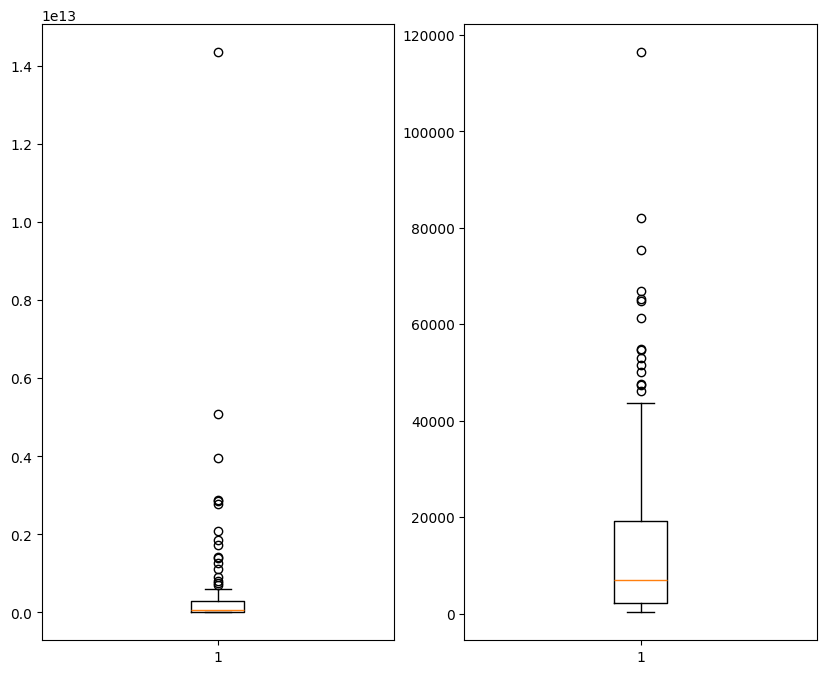

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['gdp_usd'])
ax[1].boxplot(countries_df['gdp_per_capita_usd'])
plt.show()

1.6.1 Wydatki na służbę zdrowia

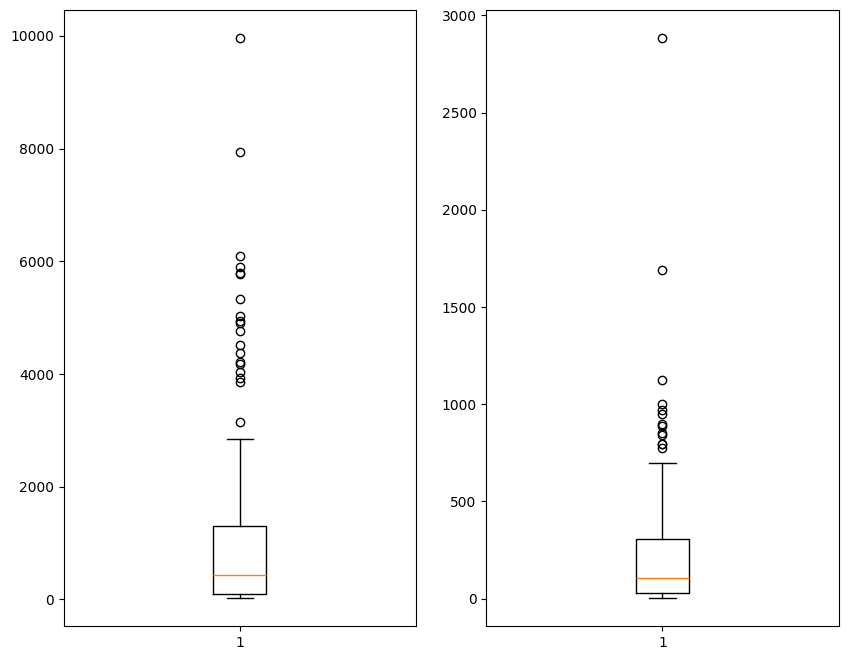

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['health_expenditure_usd'])
ax[1].boxplot(countries_df['out_of_pocket_health_expenditure_usd'])
plt.show()

1.6.2 Zaaplikowane dawki szczepionek

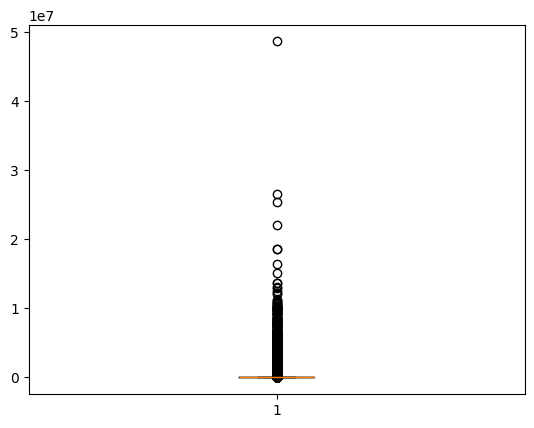

In [39]:
plt.boxplot(df['new_vaccine_doses_administered']);
plt.show()

1.6.3 liczba nowych osób przetestowanych

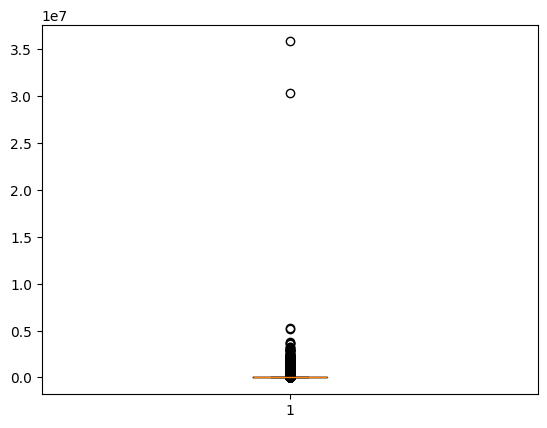

In [40]:
plt.boxplot(df['new_tested']);
plt.show()

1.6.4 Gęstość zaludnienia

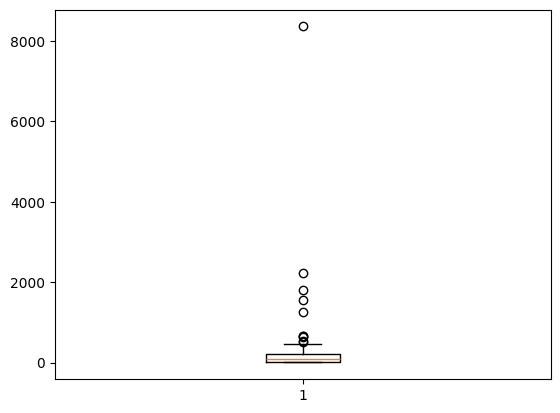

In [41]:
plt.boxplot(countries_df['population_density_x'])
plt.show()

## Część 3

3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [42]:
month = 5
year = 2021
countries = ['Italy', 'Poland', 'United States of America', 'Germany', 'Canada', 'Brazil', 'Japan', 'France', 'United Kingdom', 'China'] # ...
(
    df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .mean()
    
)

,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
country_name,,,,
Brazil,60856.225806,1903.548387,487203.580645,2.131256e+05
Canada,4.741935,48.741935,595670.354839,6.368810e+04
France,13383.741935,161.741935,333783.290323,1.754055e+05
Italy,6299.129032,171.645161,298327.838710,1.815694e+05
Japan,4957.225806,90.935484,307130.451613,9.782477e+04
Poland,3369.250000,309.250000,243724.750000,1.759185e+05
United Kingdom,2558.580645,9.225806,164998.483871,3.476583e+05
United States of America,28643.966667,511.300000,653274.000000,1.132099e+06


3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

In [43]:
# nw czym jest średnia zmiana
avg_diff = df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ].groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff()
avg_diff = avg_diff.groupby(df['country_name']).mean()
avg_diff.reset_index(inplace=True)
avg_diff

# a tez nw

,country_name,new_confirmed,new_deceased,new_persons_vaccinated
0,Brazil,-317.533333,25.233333,-3057.533333
1,Canada,0.000000,0.000000,-1046.466667
2,France,523.366667,-6.000000,1656.066667
3,Italy,155.766667,2.900000,936.066667
4,Japan,134.300000,0.333333,-8976.766667
5,Poland,-1448.333333,-86.666667,-5429.666667
6,United Kingdom,-46.033333,0.133333,-4056.100000
7,United States of America,1101.034483,10.068966,11426.896552


3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [44]:
(
    df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .median()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
BR,Brazil,72715.0,2202.0,568106.0,230915.0
CA,Canada,5.0,0.0,326726.0,28245.0
FR,France,12800.0,142.0,358032.0,192767.0
GB,United Kingdom,2365.0,9.0,143175.0,387987.0
IT,Italy,5741.0,166.0,302825.0,182114.0
JP,Japan,5032.0,91.0,288041.0,67810.0
PL,Poland,2908.0,296.0,256736.5,183919.5
US,United States of America,27467.5,529.5,661181.5,1111411.5


3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [45]:
(
    df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .std()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
BR,Brazil,20478.573226,719.123858,224685.758795,111863.270131
CA,Canada,4.389136,113.495071,677343.717999,88551.421468
FR,France,7260.341195,71.182848,116404.737838,91945.400388
GB,United Kingdom,697.958727,2.499462,55534.835181,109756.469367
IT,Italy,2933.121792,66.121377,31297.131406,42165.408654
JP,Japan,1356.244882,35.363763,212944.429938,85824.972407
PL,Poland,2289.656070,158.373767,40317.753950,37799.045354
US,United States of America,10097.384176,150.914717,256652.610181,608881.191458


3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

In [46]:
df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))]

min_values = df.groupby(['country_name']).agg({'new_confirmed': 'min', 'new_persons_vaccinated': 'min', 'new_deceased': 'min'})
min_values = min_values.reset_index()
avg_values = df.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_persons_vaccinated': 'mean', 'new_deceased': 'mean'})
avg_values = avg_values.reset_index()
max_values = df.groupby(['country_name']).agg({'new_confirmed': 'max', 'new_persons_vaccinated': 'max', 'new_deceased': 'max'})
max_values = max_values.reset_index()

merged = min_values.merge(avg_values, on='country_name', suffixes=('_min', '_avg'))
merged = merged.merge(max_values, on='country_name')
merged = merged.rename(columns={
    'new_confirmed': 'new_confirmed_max',
    'new_persons_vaccinated': 'new_persons_vaccinated_max',
    'new_deceased': 'new_deceased_max'
})
merged = merged.merge(countries_df[['country_name', 'gdp_usd']], on='country_name')

metrics = ['new_confirmed', 'new_persons_vaccinated', 'new_deceased']
titles = ['New Confirmed Cases', 'New Vaccinations', 'New Deaths']
colors = ['red', 'green', 'blue']

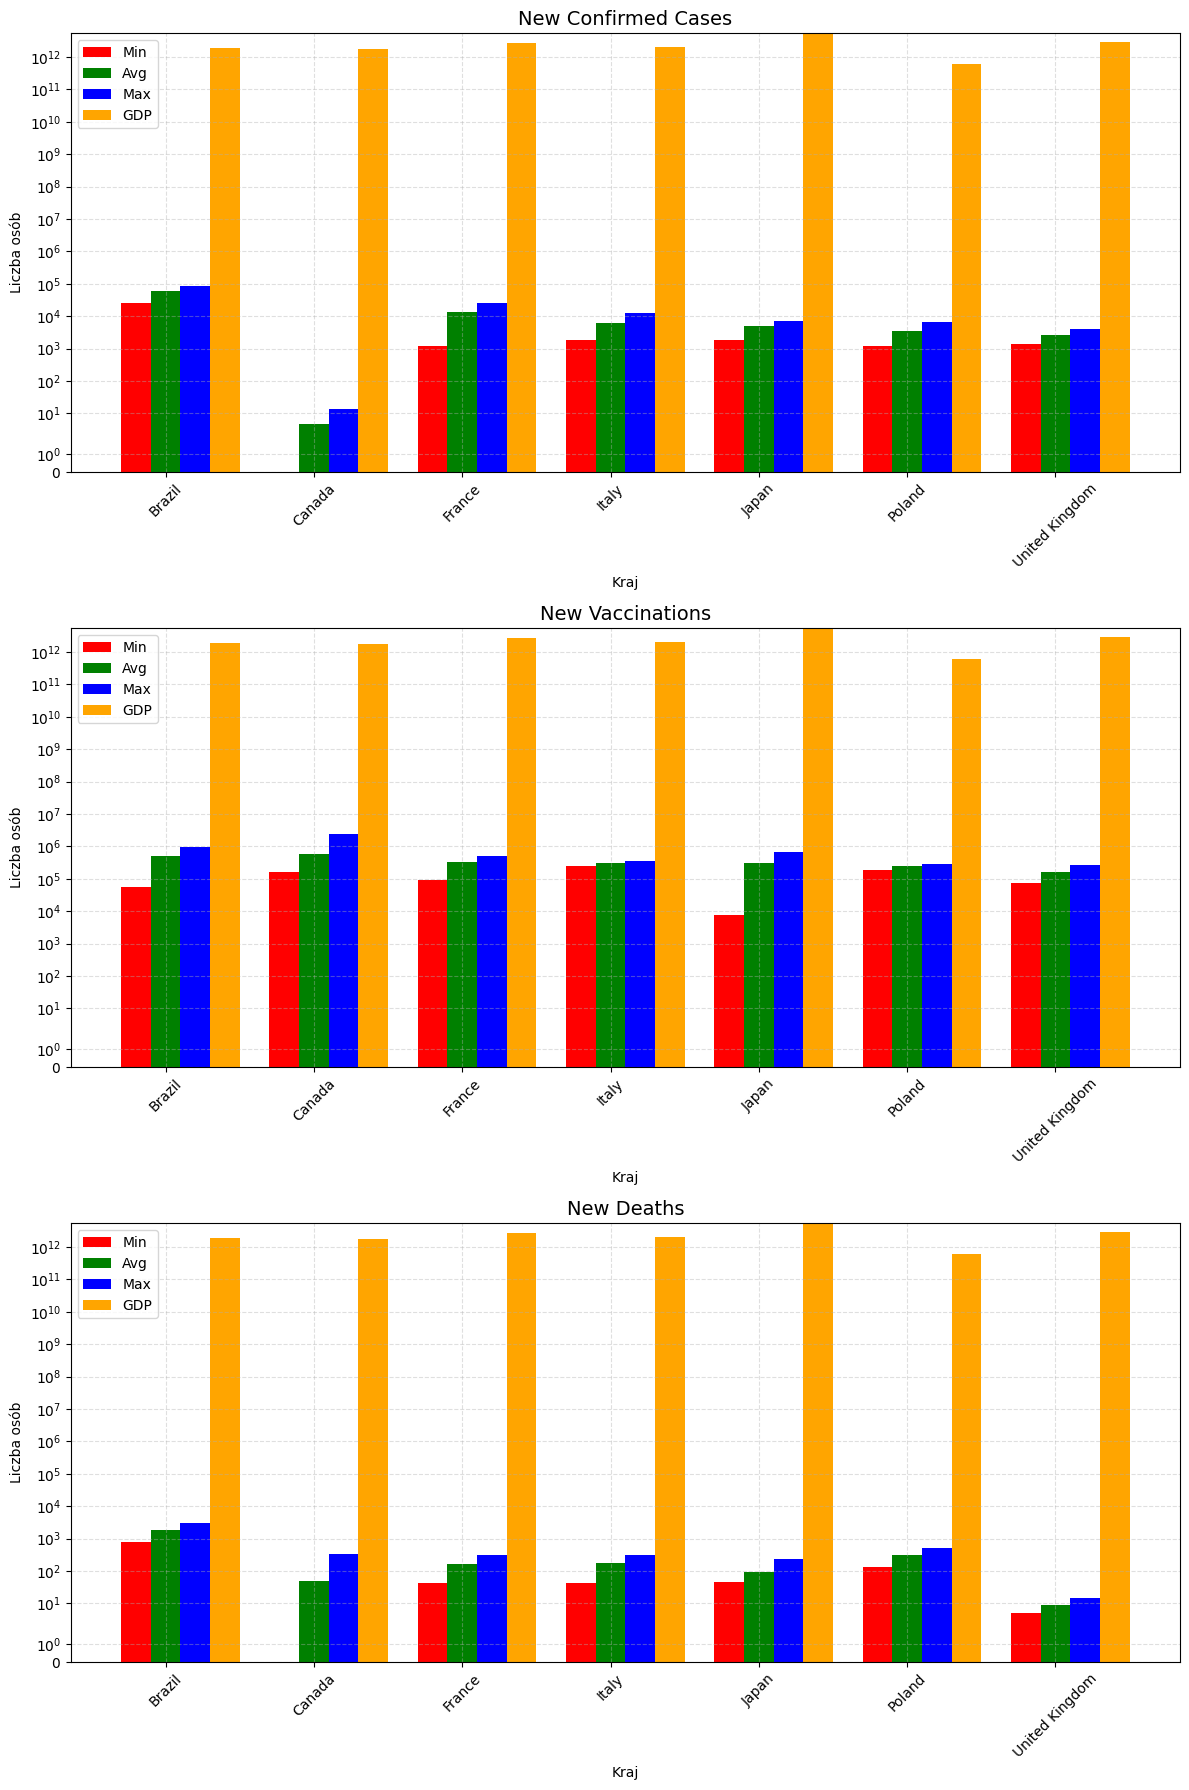

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

x = np.arange(len(merged))
width = 0.2

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['gdp_usd'],  width=width, label="GDP", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Liczba osób')
    ax.set_xlabel('Kraj')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('symlog')


plt.tight_layout()
plt.show()

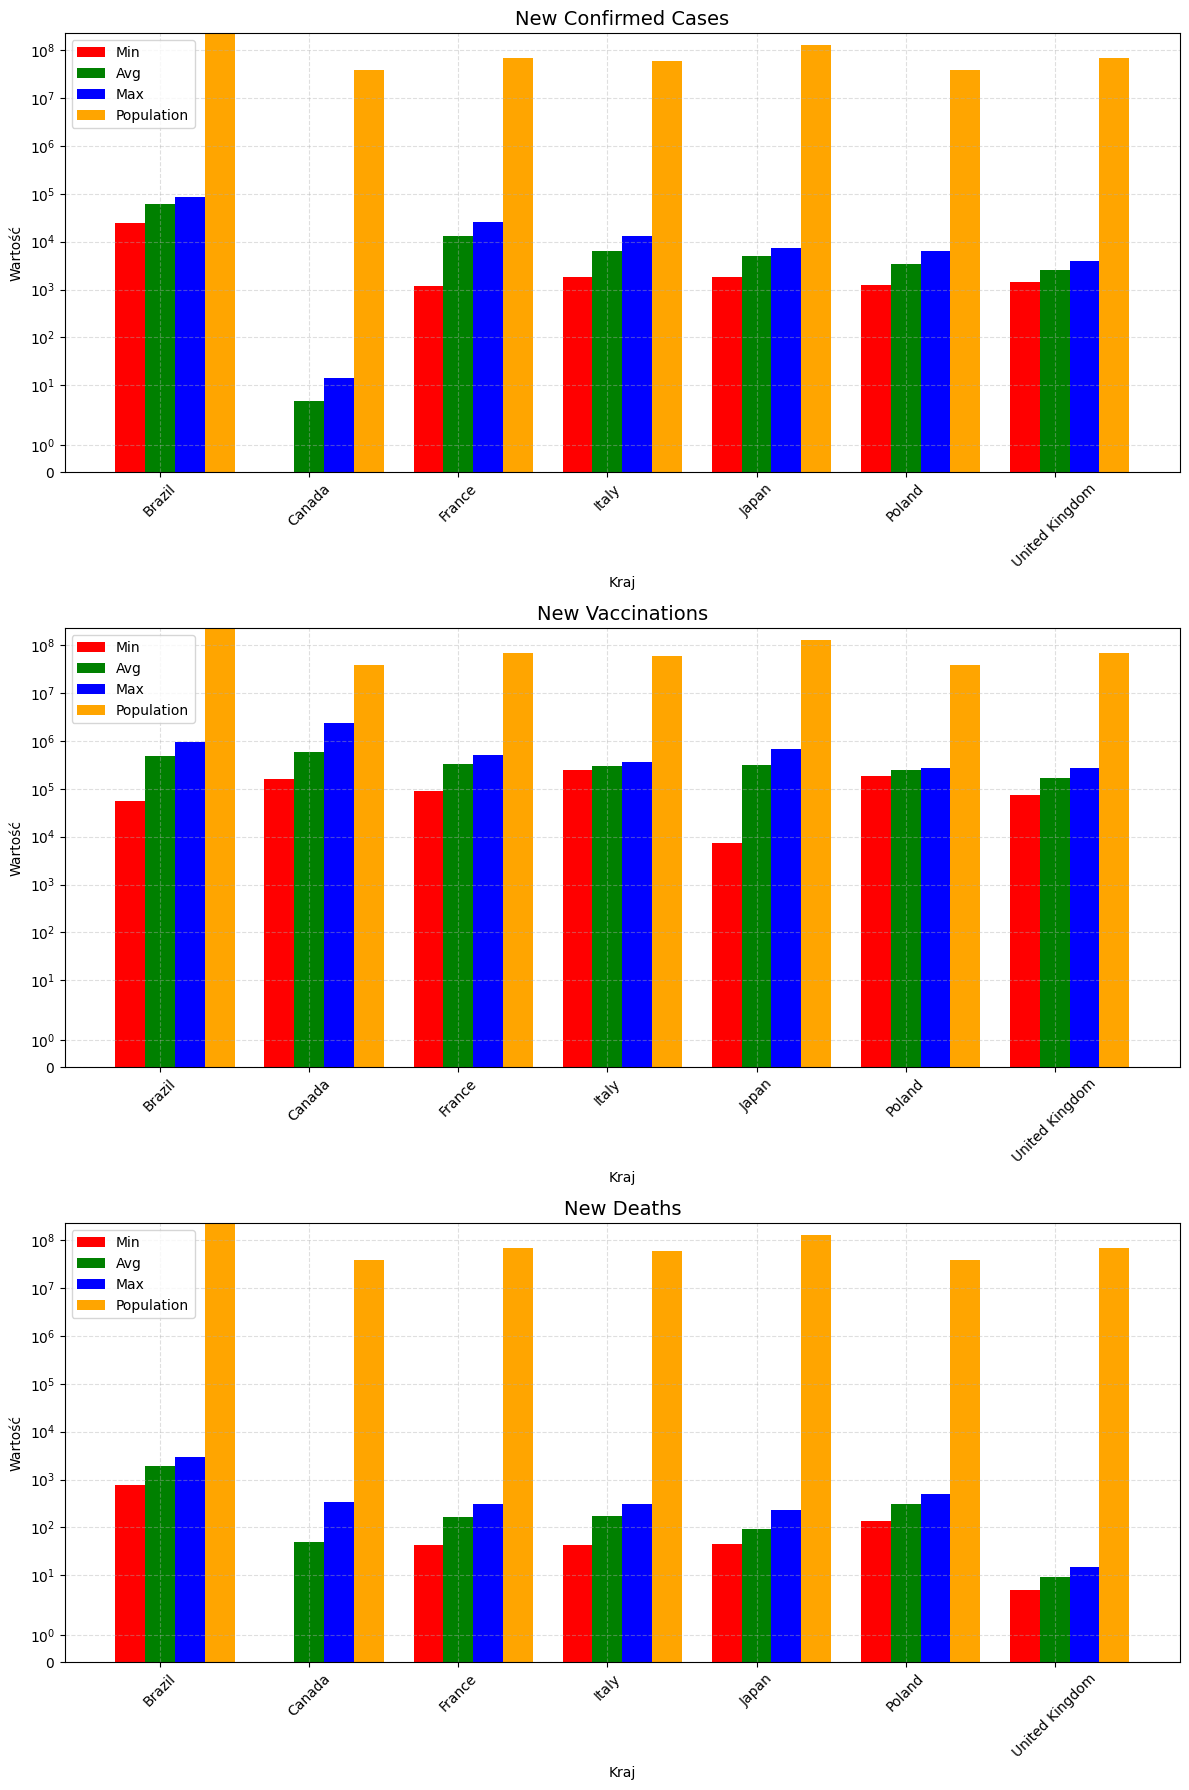

In [48]:
merged = merged.merge(countries_df[['country_name', 'population']], on='country_name')

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['population'],  width=width, label="Population", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Wartość')
    ax.set_xlabel('Kraj')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('symlog')


plt.tight_layout()
plt.show()

In [49]:
## Część 4
merged

,country_name,new_confirmed_min,new_persons_vaccinated_min,new_deceased_min,new_confirmed_avg,new_persons_vaccinated_avg,new_deceased_avg,new_confirmed_max,new_persons_vaccinated_max,new_deceased_max,gdp_usd,population
0,Brazil,24619,56407,786,60856.225806,487203.580645,1903.548387,85536,933224,2966,1839758040765,212559409
1,Canada,0,162069,0,4.741935,595670.354839,48.741935,14,2368272,335,1736425629519,37742157
2,France,1211,91744,44,13383.741935,333783.290323,161.741935,26000,507528,311,2776646200000,67012883
3,Italy,1820,246623,44,6299.129032,298327.838710,171.645161,12965,353699,305,2083196780000,60359546
4,Japan,1785,7455,45,4957.225806,307130.451613,90.935484,7244,675188,228,5081769542379,126476458
5,Poland,1230,185016,135,3369.250000,243724.750000,309.250000,6431,276410,510,585705873800,37972812
6,United Kingdom,1431,72600,5,2558.580645,164998.483871,9.225806,3921,268251,15,2860009176200,66647112


In [50]:
total_values = df.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_persons_vaccinated': 'sum',
    'new_deceased': 'sum'
}).reset_index()
total_values = total_values.merge(countries_df[['country_name', 'population', 'gdp_usd']], on='country_name')


Normalizacja na 1000 osób

In [51]:
merged['cases_per_1000'] = merged['new_confirmed_avg'] / merged['population'] * 1000
merged['vaccinations_per_1000'] = merged['new_persons_vaccinated_avg'] / merged['population'] * 1000
merged['deaths_per_1000'] = merged['new_deceased_avg'] / merged['population'] * 1000


avg_values_covid_data = df.groupby(['country_name']).agg({'new_vaccine_doses_administered': 'mean', 'new_persons_fully_vaccinated': 'mean'})
avg_values_covid_data = avg_values_covid_data.reset_index()
avg_values_countries_data = countries_df[countries_df.country_name.isin(countries)].groupby(['country_name']).agg({'health_expenditure_usd': 'mean', 'out_of_pocket_health_expenditure_usd': 'mean'})
avg_values_countries_data = avg_values_countries_data.reset_index()
avg_values_covid_data #TODO: te z countries trzeba dać x1000 bo one są już per capita i dać rename, te z covid trzeba policzyć normalnie
#TODO: dodatkowe przypadki
# doses administered per 1000, fully vaccinated per 1000, health expenditure per 1000, out of pocket health expenditure per 1000

,country_name,new_vaccine_doses_administered,new_persons_fully_vaccinated
0,Brazil,7.003292e+05,2.131256e+05
1,Canada,6.593631e+05,6.368810e+04
2,France,5.091888e+05,1.754055e+05
3,Italy,4.877150e+05,1.815694e+05
4,Japan,4.049552e+05,9.782477e+04
5,Poland,4.196435e+05,1.759185e+05
6,United Kingdom,5.126567e+05,3.476583e+05
7,United States of America,1.627800e+06,1.132099e+06


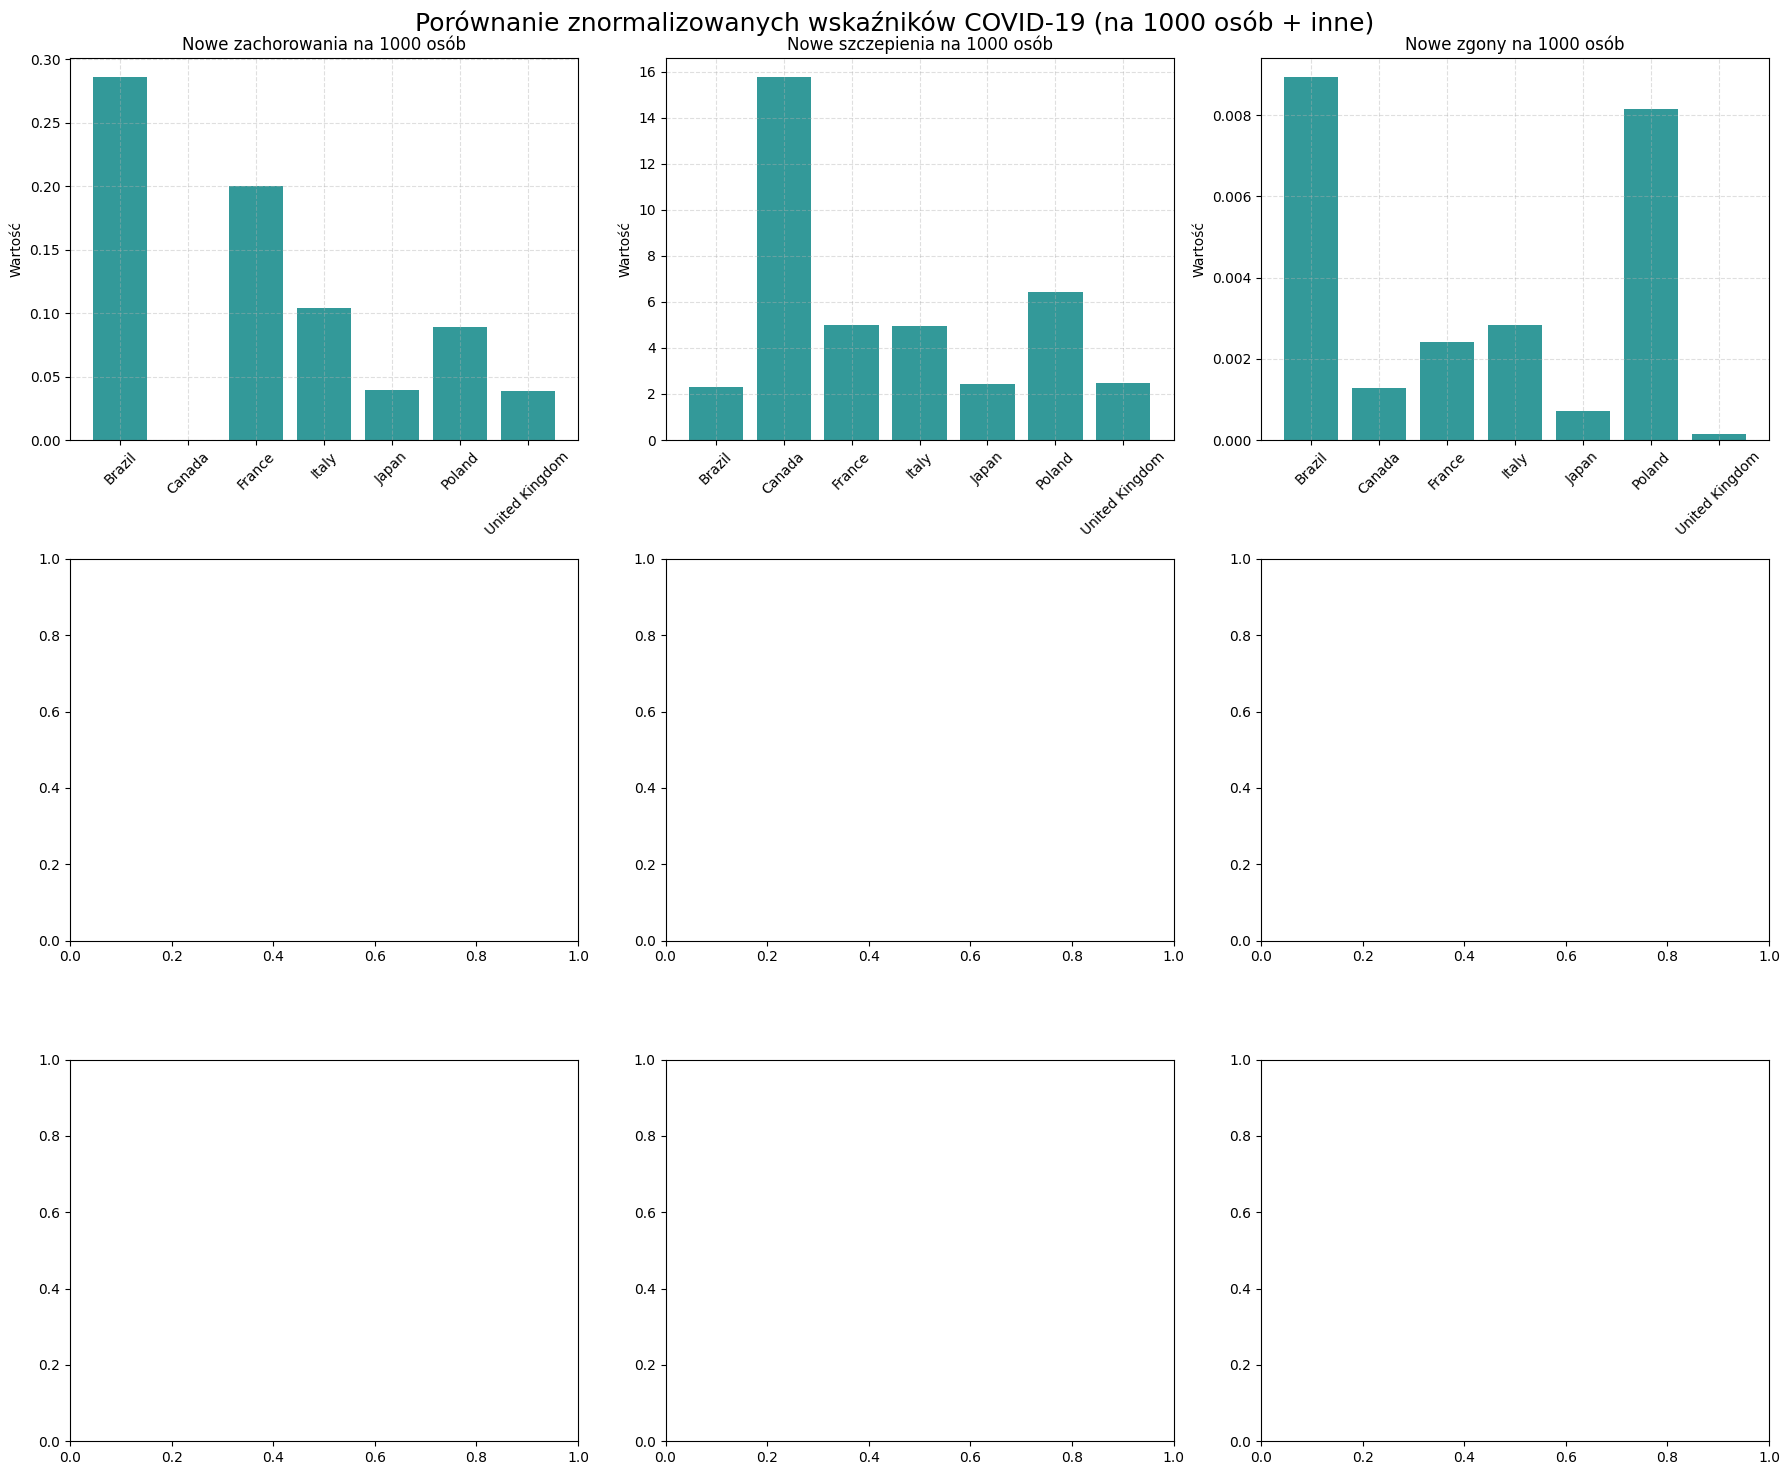

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Porównanie znormalizowanych wskaźników COVID-19 (na 1000 osób + inne)', fontsize=18)

# Lista metryk i tytułów
indicators = [
    ('cases_per_1000', 'Nowe zachorowania na 1000 osób'),
    ('vaccinations_per_1000', 'Nowe szczepienia na 1000 osób'),
    ('deaths_per_1000', 'Nowe zgony na 1000 osób'),
]

# Wykresy
for idx, (col, title) in enumerate(indicators):
    row, col_pos = divmod(idx, 3)
    ax = axes[row, col_pos]
    
    if col in merged.columns:
        data = merged

    countries = data['country_name']
    values = data[col]
    
    ax.bar(countries, values, color='teal', alpha=0.8)
    ax.set_title(title)
    ax.set_ylabel('Wartość')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
#TODO: Poprawić bo to sprawka wiadomego narzędzia